In [1]:
from datasets import load_dataset
import numpy as np
import pandas as pd

In [25]:
df = load_dataset("GroNLP/ik-nlp-22_transqe")["train"].to_pandas()
df

,premise_en,premise_nl,hypothesis_en,hypothesis_nl,label,explanation_1_en,explanation_1_nl,explanation_2_en,explanation_2_nl,explanation_3_en,...,da_premise,mqm_premise,da_hypothesis,mqm_hypothesis,da_explanation_1,mqm_explanation_1,da_explanation_2,mqm_explanation_2,da_explanation_3,mqm_explanation_3
0,A person on a horse jumps over a broken down airplane.,Een persoon op een paard springt over een kapot vliegtuig.,A person is training his horse for a competition.,Iemand traint zijn paard voor een wedstrijd.,1,the person is not necessarily training his horse,de persoon traint niet noodzakelijkerwijs zijn paard,,,,...,0.3882,0.1117,0.7113,0.1305,0.5262,0.1318,,,,
1,A person on a horse jumps over a broken down airplane.,Een persoon op een paard springt over een kapot vliegtuig.,"A person is at a diner, ordering an omelette.","Een persoon is in een restaurant, bestelt een omelet.",2,One cannot be on a jumping horse cannot be a diner ordering food.,Men kan niet op een springpaard zitten kan geen diner zijn dat eten bestelt.,,,,...,0.388,0.1117,0.1745,0.133,0.0027,0.0606,,,,
2,A person on a horse jumps over a broken down airplane.,Een persoon op een paard springt over een kapot vliegtuig.,"A person is outdoors, on a horse.","Een persoon is buiten, op een paard.",0,a broken down airplane is outdoors,een kapot vliegtuig is buiten,,,,...,0.3883,0.1117,0.0003,0.1126,0.5602,0.1126,,,,
3,Children smiling and waving at camera,Kinderen lachen en zwaaien naar de camera,They are smiling at their parents,Ze lachen naar hun ouders,1,Just because they are smiling and waving at a camera does not imply their parents or anyone is anyone behind it,Alleen omdat ze lachen en zwaaien naar een camera impliceert niet dat hun ouders of iemand erachter zit,,,,...,0.641,0.1189,0.421,0.1209,0.3506,0.1161,,,,
4,Children smiling and waving at camera,Kinderen lachen en zwaaien naar de camera,There are children present,Er zijn kinderen aanwezig,0,The children must be present to see them smiling and waving.,De kinderen moeten aanwezig zijn om ze te zien lachen en zwaaien,,,,...,0.641,0.1189,0.981,0.143,0.6185,0.1171,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,Four dirty and barefooted children.,Vier vieze en blote voeten kinderen.,four kids won awards for 'cleanest feet',vier kinderen wonnen prijzen voor'schoonste voeten',2,in a both sentence dirty and cleanest are not same.,in een beide zin vuil en schoonste zijn niet hetzelfde.,,,,...,0.0436,0.101,0.3029,0.112,0.0,0.078,,,,
549363,Four dirty and barefooted children.,Vier vieze en blote voeten kinderen.,"four homeless children had their shoes stolen, so their feet are dirty.","Vier dakloze kinderen hebben hun schoenen gestolen, dus hun voeten zijn vies.",1,the children are not necessarily homeless,de kinderen zijn niet noodzakelijk dakloos,,,,...,0.046,0.1009,0.3846,0.1052,0.7115,0.1369,,,,
549364,A man is surfing in a bodysuit in beautiful blue water.,Een man surft in een lijkpak in prachtig blauw water.,A man in a bodysuit is competing in a surfing competition.,Een man in een bodysuit doet mee aan een surfwedstrijd.,1,the man is not necessarily competing,de man is niet per se competitief,,,,...,0.5112,0.1175,0.7024,0.1386,0.5658,0.1244,,,,
549365,A man is surfing in a bodysuit in beautiful blue water.,Een man surft in een lijkpak in prachtig blauw water.,A man in a business suit is heading to a board meeting.,Een man in een zakenpak gaat naar een bestuursvergadering.,2,That is either a business suit or bodysuit.,Dat is een zakenpak of een bodysuit.,,,,...,0.5113,0.1174,0.3934,0.1289,0.1277,0.1115,,,,


In [26]:
df["da_hypothesis"] = df["da_hypothesis"].astype("float")
df["da_premise"] = df["da_premise"].astype("float")
df["mqm_hypothesis"] = df["mqm_hypothesis"].astype("float")
df["mqm_premise"] = df["mqm_premise"].astype("float")

<AxesSubplot: xlabel='da_hypothesis', ylabel='da_premise'>

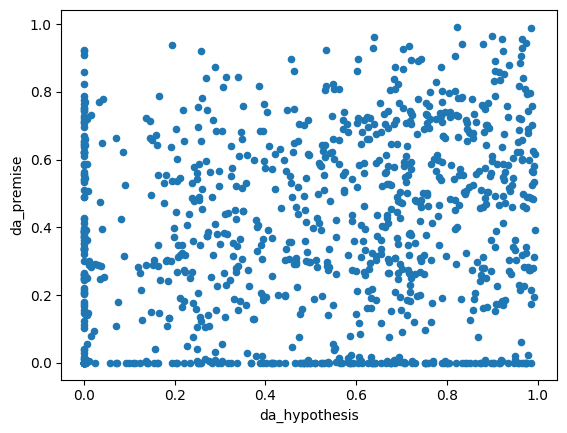

In [55]:
df.sample(1000).plot(kind="scatter", x = "da_hypothesis", y = "da_premise")

<AxesSubplot: xlabel='mqm_hypothesis', ylabel='mqm_premise'>

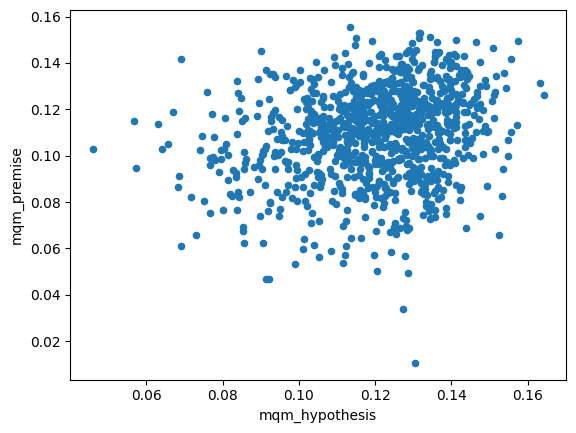

In [17]:
df.sample(1000).plot(kind="scatter", x = "mqm_hypothesis", y = "mqm_premise")

<AxesSubplot: xlabel='da_hypothesis', ylabel='mqm_hypothesis'>

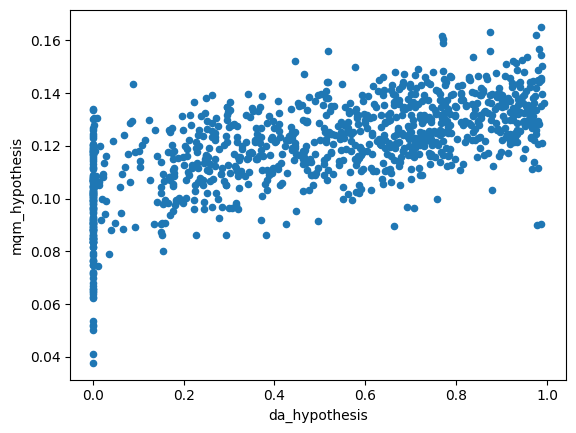

In [14]:
df.sample(1000).plot(kind="scatter", x = "da_hypothesis", y = "mqm_hypothesis")

<AxesSubplot: xlabel='da_premise', ylabel='mqm_premise'>

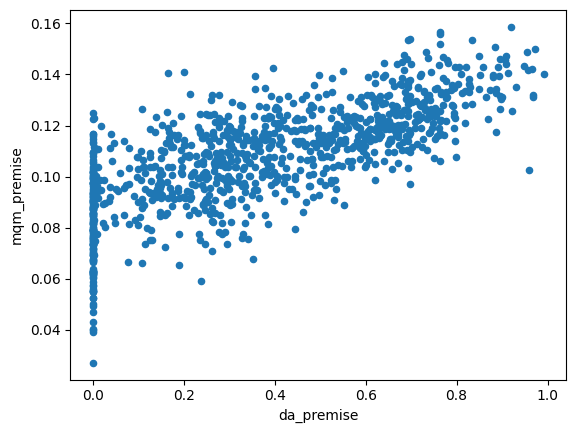

In [18]:
df.sample(1000).plot(kind="scatter", x = "da_premise", y = "mqm_premise")

In [37]:
def value_from_percentage(percentage: float, cols: list[str], df: pd.DataFrame):
    """Given a percentage, approximates for what da or mqm thershold, you keep
    that percentage of data, given all da/mqm filter values are the same.
    """
    
    min = 0.0
    max = 1.0
    total_len = len(df)

    for _ in range(100):
        new_try = (min + max) / 2.0
        new_len = (df[cols] > new_try).all(axis=1).sum()
        new_perc = new_len / total_len
        if new_perc > percentage:
            min = new_try
        else:
            max = new_try
    
    print(f"I found value {new_try}, which keeps {new_perc:.5f} of the original length ({new_len}/{total_len})")

value_from_percentage(0.1, ["mqm_hypothesis", "mqm_premise"], df)

I found value 0.127, which keeps 0.09942 of the original length (54616/549367)


In [14]:
df = load_dataset("maximedb/sick_nl", split="train+test+validation").to_pandas()

In [16]:
df = df[["label", "entailment_label", "entailment_AB", "entailment_BA"]]
df

,label,entailment_label,entailment_AB,entailment_BA
0,1,NEUTRAL,A_neutral_B,B_neutral_A
1,1,NEUTRAL,A_contradicts_B,B_neutral_A
2,2,ENTAILMENT,A_entails_B,B_entails_A
3,1,NEUTRAL,A_neutral_B,B_neutral_A
4,1,NEUTRAL,A_neutral_B,B_neutral_A
...,...,...,...,...
9835,1,NEUTRAL,A_neutral_B,B_neutral_A
9836,1,NEUTRAL,A_neutral_B,B_neutral_A
9837,1,NEUTRAL,A_neutral_B,B_neutral_A
9838,1,NEUTRAL,A_neutral_B,B_neutral_A


In [18]:
from collections import Counter

filter = df["label"] == 2
print(Counter(df[filter]["entailment_label"].to_list()))
print(Counter(df[filter]["entailment_AB"].to_list()))
print(Counter(df[filter]["entailment_BA"].to_list()))
print()

filter = df["label"] == 1
print(Counter(df[filter]["entailment_label"].to_list()))
print(Counter(df[filter]["entailment_AB"].to_list()))
print(Counter(df[filter]["entailment_BA"].to_list()))
print()

filter = df["label"] == 0
print(Counter(df[filter]["entailment_label"].to_list()))
print(Counter(df[filter]["entailment_AB"].to_list()))
print(Counter(df[filter]["entailment_BA"].to_list()))
print()

Counter({'ENTAILMENT': 2821})
Counter({'A_entails_B': 2821})
Counter({'B_neutral_A': 1513, 'B_entails_A': 1300, 'B_contradicts_A': 8})

Counter({'NEUTRAL': 5595})
Counter({'A_neutral_B': 5268, 'A_contradicts_B': 327})
Counter({'B_neutral_A': 5319, 'B_contradicts_A': 276})

Counter({'CONTRADICTION': 1424})
Counter({'A_contradicts_B': 1424})
Counter({'B_contradicts_A': 1424})



Fuck me! I thought label was always same as B entails A...
Will have to rethink shizzle lol :-p

In [16]:
df = load_dataset("GroNLP/ik-nlp-22_transqe")["train"].to_pandas()
df

,premise_en,premise_nl,hypothesis_en,hypothesis_nl,label,explanation_1_en,explanation_1_nl,explanation_2_en,explanation_2_nl,explanation_3_en,...,da_premise,mqm_premise,da_hypothesis,mqm_hypothesis,da_explanation_1,mqm_explanation_1,da_explanation_2,mqm_explanation_2,da_explanation_3,mqm_explanation_3
0,A person on a horse jumps over a broken down airplane.,Een persoon op een paard springt over een kapot vliegtuig.,A person is training his horse for a competition.,Iemand traint zijn paard voor een wedstrijd.,1,the person is not necessarily training his horse,de persoon traint niet noodzakelijkerwijs zijn paard,,,,...,0.3882,0.1117,0.7113,0.1305,0.5262,0.1318,,,,
1,A person on a horse jumps over a broken down airplane.,Een persoon op een paard springt over een kapot vliegtuig.,"A person is at a diner, ordering an omelette.","Een persoon is in een restaurant, bestelt een omelet.",2,One cannot be on a jumping horse cannot be a diner ordering food.,Men kan niet op een springpaard zitten kan geen diner zijn dat eten bestelt.,,,,...,0.388,0.1117,0.1745,0.133,0.0027,0.0606,,,,
2,A person on a horse jumps over a broken down airplane.,Een persoon op een paard springt over een kapot vliegtuig.,"A person is outdoors, on a horse.","Een persoon is buiten, op een paard.",0,a broken down airplane is outdoors,een kapot vliegtuig is buiten,,,,...,0.3883,0.1117,0.0003,0.1126,0.5602,0.1126,,,,
3,Children smiling and waving at camera,Kinderen lachen en zwaaien naar de camera,They are smiling at their parents,Ze lachen naar hun ouders,1,Just because they are smiling and waving at a camera does not imply their parents or anyone is anyone behind it,Alleen omdat ze lachen en zwaaien naar een camera impliceert niet dat hun ouders of iemand erachter zit,,,,...,0.641,0.1189,0.421,0.1209,0.3506,0.1161,,,,
4,Children smiling and waving at camera,Kinderen lachen en zwaaien naar de camera,There are children present,Er zijn kinderen aanwezig,0,The children must be present to see them smiling and waving.,De kinderen moeten aanwezig zijn om ze te zien lachen en zwaaien,,,,...,0.641,0.1189,0.981,0.143,0.6185,0.1171,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,Four dirty and barefooted children.,Vier vieze en blote voeten kinderen.,four kids won awards for 'cleanest feet',vier kinderen wonnen prijzen voor'schoonste voeten',2,in a both sentence dirty and cleanest are not same.,in een beide zin vuil en schoonste zijn niet hetzelfde.,,,,...,0.0436,0.101,0.3029,0.112,0.0,0.078,,,,
549363,Four dirty and barefooted children.,Vier vieze en blote voeten kinderen.,"four homeless children had their shoes stolen, so their feet are dirty.","Vier dakloze kinderen hebben hun schoenen gestolen, dus hun voeten zijn vies.",1,the children are not necessarily homeless,de kinderen zijn niet noodzakelijk dakloos,,,,...,0.046,0.1009,0.3846,0.1052,0.7115,0.1369,,,,
549364,A man is surfing in a bodysuit in beautiful blue water.,Een man surft in een lijkpak in prachtig blauw water.,A man in a bodysuit is competing in a surfing competition.,Een man in een bodysuit doet mee aan een surfwedstrijd.,1,the man is not necessarily competing,de man is niet per se competitief,,,,...,0.5112,0.1175,0.7024,0.1386,0.5658,0.1244,,,,
549365,A man is surfing in a bodysuit in beautiful blue water.,Een man surft in een lijkpak in prachtig blauw water.,A man in a business suit is heading to a board meeting.,Een man in een zakenpak gaat naar een bestuursvergadering.,2,That is either a business suit or bodysuit.,Dat is een zakenpak of een bodysuit.,,,,...,0.5113,0.1174,0.3934,0.1289,0.1277,0.1115,,,,


In [17]:
df1 = df[["premise_en", "premise_nl", "mqm_premise"]]

In [32]:
df["mqm_hypothesis"].astype(float).quantile(.5)

0.1221

In [24]:
pd.set_option('display.max_colwidth', None)
df1[ df1["mqm_premise"].astype(float) > 0.1336].sample(20)

,premise_en,premise_nl,mqm_premise
513058,A girl peers into a window.,Een meisje kijkt tegen een raam.,0.1453
179125,A man lies on a blue blanket with a child on his back.,Een man ligt op een blauwe deken met een kind op zijn rug.,0.1408
464197,A blond female child spreads Nesquik powder onto a table.,Een blond vrouwtje verspreidt Nesquik poeder op een tafel.,0.1348
234140,Different kind of people roaming around in a public market,Verschillende soorten mensen die rondzwerven op een openbare markt,0.1507
374116,A group of people sitting in white plastic chairs are having a picnic.,Een groep mensen in witte plastic stoelen zijn aan het picknicken.,0.1362
129810,A man in a black shirt swims next to a girl on a pink surfboard.,Een man in een zwart shirt zwemt naast een meisje op een roze surfplank.,0.1354
239037,A brown-haired boy is wearing a red t-shirt and headphones as he watches TV.,Een bruinharige jongen draagt een rood t-shirt en hoofdtelefoon terwijl hij tv kijkt.,0.1392
371933,There is a reflection near the bear's feet indicating there is water.,Er is een reflectie bij de voeten van de beer die aangeeft dat er water is.,0.1353
493303,A group of people are standing beside a firetruck.,Een groep mensen staat naast een brandweerwagen.,0.1338
480460,A woman is sitting down reading a book.,Een vrouw zit een boek te lezen.,0.1395


In [37]:
d = {0: "entailment", 1: "neutral", 2: "contra"}

df["label"] = df["label"].map(d)

In [51]:
for r in df.sample(100).iterrows():
    r = r[1]
    
    print(f"""
Premise:        {r['premise_nl']}
Hypothesis:     {r['hypothesis_nl']}
Label:          {r['label']}
""")


Premise:        Sommige mensen wachten op een trein om te stoppen, sommige mensen vertrekken terwijl de meeste blijven.
Hypothesis:     De mensen zijn in de buurt van het spoor.
Label:          entailment


Premise:        Een vrouw met grijs haar pakt een tomaat en test op rijpheid in een buitenmarkt als de handelaar kijkt op.
Hypothesis:     De vrouw is in de supermarkt.
Label:          contra


Premise:        Een jong meisje speelt gluurder, bedekt de ogen van de man op wiens schouders ze zit.
Hypothesis:     Een jong meisje roept naar een man.
Label:          contra


Premise:        Vier mensen kijken naar papier met, twee van hen hebben microfoons en zingen.
Hypothesis:     mensen zingen voor menigte
Label:          neutral


Premise:        Een blonde vrouw in een bruin shirt met een sms.
Hypothesis:     Een blonde vrouw sms't haar man.
Label:          neutral


Premise:        Een vrouw in een lichtroze trui die een vislijn in een meer gooit.
Hypothesis:     Een vrouw die roz

In [52]:
df = load_dataset("maximedb/sick_nl", split="train+test+validation").to_pandas()

In [55]:
df = df[["sentence_A", "sentence_B", "entailment_AB", "entailment_BA"]]

In [59]:
for r in df.sample(100).iterrows():
    r = r[1]
    print(f"""
Sentence_A:     {r['sentence_A']}
Sentence_B:     {r['sentence_B']}
entailment_AB:  {r['entailment_AB']}

(entailment_BA: {r['entailment_BA']})
----------------------------------------------------
""")


Sentence_A:     Een bruine hond loopt door een besneeuwd pad
Sentence_B:     Een bruine hond loopt door een besneeuwd spoor
entailment_AB:  A_entails_B

(entailment_BA: B_entails_A)
----------------------------------------------------


Sentence_A:     De mannen zijn aan het praten
Sentence_B:     Sommige vrouwen zijn aan het praten
entailment_AB:  A_neutral_B

(entailment_BA: B_neutral_A)
----------------------------------------------------


Sentence_A:     Een bebaarde man staat bij een winkelwagentje en houdt een kartonnen bord vast
Sentence_B:     Een man houdt een bord vast en is op zoek naar geld
entailment_AB:  A_neutral_B

(entailment_BA: B_neutral_A)
----------------------------------------------------


Sentence_A:     Een hond met lang haar en een rood vest rent in het gras
Sentence_B:     De hond in het rode vest rent in het veld
entailment_AB:  A_entails_B

(entailment_BA: B_neutral_A)
----------------------------------------------------


Sentence_A:     Een hond met he